In [ ]:
# Set the dimensions of the volume
width = 181
height = 217
depth = 181

# Open the input file in binary mode
with open("BrainWeb/t1_icbm_normal_1mm_pn7_rf20.rawb", "rb") as file:
    # Loop through each slice in the volume
    for z in range(depth):
        # Create a new PGM file for the slice
        with open(f'Extracted_files//pgm//t1_icbm_normal_1mm_pn7_rf20//slice_{z}.pgm', "w+") as pgm_file:
            # Write the PGM file header
            pgm_file.write("P2\n")
            pgm_file.write("#\n")
            pgm_file.write(f"{width} {height}\n")
            pgm_file.write("255\n")

            # Loop through each row in the slice
            for y in range(height):
                # Read a row of data from the input file
                row_data = file.read(width)  # Each value is 1 byte
                # Unpack the row data into a list of integers
                values = struct.unpack(f"{width}B", row_data)
                
                # Find the maximum value in the input data
                max_value = max(values)
                
                if max_value == 0:
                    # Handle the case where all values are zero
                    scaled_values = [0] * width
                else:
                    # Scale the values down to the maximum range of 255
                    #scaled_values = [int(v * 255 / max_value) for v in values]
                    scaled_values = [int(v) for v in values]

                # Convert each scaled value to decimal and write it to the PGM file
                pgm_file.write(" ".join([str(v) for v in scaled_values]) + "\n")


In [ ]:
# Set the input and output directories
input_dir = "Extracted_files/pgm/t1_icbm_normal_1mm_pn7_rf20"
output_dir = "Extracted_files/jpg/t1_icbm_normal_1mm_pn7_rf20"

# Loop through all of the PGM files in the input directory
for file in os.listdir(input_dir):
    if file.endswith(".pgm"):
        # Open the PGM file
        with Image.open(os.path.join(input_dir, file)) as img:
            # Convert the PGM file to a JPEG file
            img.save(os.path.join(output_dir, os.path.splitext(file)[0] + ".jpg"), "JPEG")


<>:17: SyntaxWarning: invalid escape sequence '\j'
<>:17: SyntaxWarning: invalid escape sequence '\j'
C:\Users\Shruti Pathak\AppData\Local\Temp\ipykernel_5996\3237605167.py:17: SyntaxWarning: invalid escape sequence '\j'
  data = io.imread('volumes\\t1_icbm_normal_1mm_pn0_rf0\jpg\\slice_78.jpg', as_gray=True)


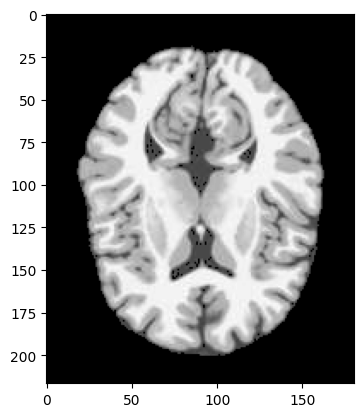

In [23]:
import numpy as np 
#import pandas as pd 
import matplotlib.pyplot as plt 
from skimage import io 

import sys
sys.setrecursionlimit(10000000)

def dfs(x, y, data, skull_mask):
    nxt = [(x+1, y), (x-1, y), (x, y+1), (x, y-1)]
    for (dx,dy) in nxt:
        if dx >= 0 and dy >= 0 and dx < data.shape[0] and dy < data.shape[1] and data[dx, dy] > 0 and not vis[dx][dy]:
            vis[dx][dy] = True
            skull_mask[dx, dy] = True
            dfs(dx, dy, data, skull_mask)

data = io.imread('volumes\\t1_icbm_normal_1mm_pn0_rf0\jpg\\slice_78.jpg', as_gray=True)
data = data.astype('int')

vis = np.zeros_like(data, dtype=bool)
skull_mask = np.zeros_like(data, dtype=bool)

max_count = 0

for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        if data[i, j] > 33 and not vis[i][j]:
            temp_skull_mask = np.zeros_like(data, dtype=bool)
            stck = [[i, j]]
            current_count = 0
            while stck:
                x, y = stck[-1]
                temp_skull_mask[x,y] = True
                current_count += 1
                stck.pop()
                nxt = [(x+1, y), (x-1, y), (x, y+1), (x, y-1)]
                for (dx,dy) in nxt:
                    if dx >= 0 and dy >= 0 and dx < data.shape[0] and dy < data.shape[1] and data[dx, dy] > 40 and not vis[dx][dy]:
                        vis[dx][dy] = True
                        stck.append((dx, dy))
            if current_count > max_count:
                max_count = current_count
                skull_mask = temp_skull_mask

# Apply skull mask to the original image to obtain the skull region
skull_image = np.where(skull_mask, data, 0)

plt.imshow(skull_image, cmap='gray')
plt.show()


In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

def dfs(x, y, data, skull_mask):
    nxt = [(x+1, y), (x-1, y), (x, y+1), (x, y-1)]
    for (dx, dy) in nxt:
        if 0 <= dx < data.shape[0] and 0 <= dy < data.shape[1] and data[dx, dy] > 0 and not vis[dx][dy]:
            vis[dx][dy] = True
            skull_mask[dx, dy] = True
            dfs(dx, dy, data, skull_mask)

# Input and output folders
input_folder =  'volumes2\\t1_icbm_normal_1mm_pn1_rf40'
output_folder = 'skullstriped2\\t1_icbm_normal_1mm_pn1_rf40\\jpg'

# Ensure output folder exists
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Process each image in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        try:
            # Read the image
            filepath = os.path.join(input_folder, filename)
            #print("Processing:", filepath)  # Add debug output
            data = io.imread(filepath, as_gray=True).astype(int)


            vis = np.zeros_like(data, dtype=bool)
            skull_mask = np.zeros_like(data, dtype=bool)

            max_count = 0

            for i in range(data.shape[0]):
                for j in range(data.shape[1]):
                    if data[i, j] > 42 and not vis[i][j]:
                        temp_skull_mask = np.zeros_like(data, dtype=bool)
                        stck = [(i, j)]
                        current_count = 0
                        while stck:
                            x, y = stck.pop()
                            temp_skull_mask[x, y] = True
                            current_count += 1
                            nxt = [(x+1, y), (x-1, y), (x, y+1), (x, y-1)]
                            for (dx, dy) in nxt:
                                if 0 <= dx < data.shape[0] and 0 <= dy < data.shape[1] and data[dx, dy] > 42 and not vis[dx][dy]:
                                    vis[dx][dy] = True
                                    stck.append((dx, dy))
                        if current_count > max_count:
                            max_count = current_count
                            skull_mask = temp_skull_mask

            # Apply skull mask to the original image to obtain the skull region
            skull_image = np.where(skull_mask, data, 0)

            # Save the skull-stripped image to the output folder
            output_filepath = os.path.join(output_folder, filename)
            io.imsave(output_filepath, skull_image.astype(np.uint8))

           # print(f"Processed: {filename}")
        except Exception as e:
            print(f"Error processing {filename}: {e}")

print("Processing complete.")


Processing complete.


In [22]:
import os
import cv2

def jpg_to_p2_pgm(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate through all files in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith(".jpg"):
            # Read the image
            input_file = os.path.join(input_folder, filename)
            img = cv2.imread(input_file, cv2.IMREAD_GRAYSCALE)

            # Write the image in P2 PGM format
            output_file = os.path.join(output_folder, os.path.splitext(filename)[0] + ".pgm")
            with open(output_file, 'w') as f:
                f.write("P2\n")
                f.write("# P2 PGM file\n")
                f.write(f"{img.shape[1]} {img.shape[0]}\n")  # Width and height
                f.write("255\n")  # Maximum gray value
                for row in img:
                    for pixel in row:
                        f.write(f"{pixel} ")
                    f.write("\n")

# Example usage:
input_folder = 'skullstriped2\\t1_icbm_normal_1mm_pn1_rf40\\jpg'
output_folder = 'skullstriped2\\t1_icbm_normal_1mm_pn1_rf40\\pgm'
jpg_to_p2_pgm(input_folder, output_folder)
